<a href="https://colab.research.google.com/github/bachtiar09/ImprovingEmployeeRetentionbyPredictingEmployeeAttritionUsingMachineLearning/blob/main/%60Improving_Employee_Retention_by_Predicting_Employee_Attrition_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx'

In [ ]:
df= pd.read_excel(url)
pd.set_option('display.max_columns',None)
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


1. Download file Dataset 2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat sesuai dengan skala ukur pada data) 3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "PernahBekerja") 4. Membuang data yang tidak diperlukan (Hint: Cari dan buang kolom yang memiliki satu unique value (konstanta))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [ ]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


#hadle mising value

In [ ]:
df=df.drop(['IkutProgramLOP'],axis=1)

In [ ]:
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')

#Mengganti value yang tidak sesuai

In [ ]:
df['PernahBekerja']  = np.where(df['PernahBekerja']=='Yes',1,0)

In [ ]:
#rubah data type kolom object jadi datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')
     

In [ ]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,PernahBekerja
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,287.0
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.0
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.0
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.0
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,0.0
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,0.0
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,0.0


#Membuang data yang tidak diperlukan

In [ ]:
#menghapus kolom PernahBekerja karena isinya hanya 1 unique value
df=df.drop(columns=['PernahBekerja'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

#2

In [ ]:
# Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year

In [ ]:
df_hr=df.groupby(['TahunHiring']).agg({'TahunHiring': ['count'],
                                 'TahunResign': ['count']
})
df_hr.columns= ['KaryawanHiring','KaryawanResign']
df_hr['Total_Karyawan'] = df_hr['KaryawanHiring'] - df_hr['KaryawanResign']
df_hr.reset_index().rename(columns ={'TahunHiring':'Tahun'})
list(enumerate(df_hr))

[(0, 'KaryawanHiring'), (1, 'KaryawanResign'), (2, 'Total_Karyawan')]

Text(0.5, 0, 'Tahun')

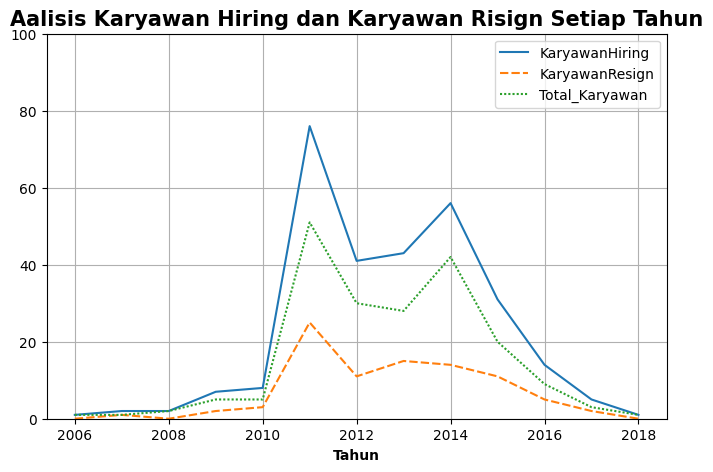

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=df_hr)
plt.grid()
plt.ylim(0, 100)

plt.title("Aalisis Karyawan Hiring dan Karyawan Risign Setiap Tahun", fontsize=15, fontweight='bold')
plt.xlabel("Tahun", fontsize=10, fontweight='bold')




*   berdasarkan grafik dia atas dinamika perubahan kenaikan dan penurunan jumlah karywan mengalami kenaikan dan penurunan
* Peningkatan dan penurunan jumlah karyawan yang di hiring setiap tahunnya juga diikuti karyawan yang resign setiap tahunnya
* Kita bisa melihat bahwa jumlah karyawan yang di hiring setiap tahun lebih banyak dari pada karyawan yang risign
*   Pada kurun waktu 2010-12 ada peningkatan jumlah hiring karyawan terbanyak namum juga yang resign karyawan juga  banyak
* kondisi ini masih dapat dibilang masih baik karena karyawan yang risign lebih rendah dari jumlah total karyawan yang ada



#3
1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign (Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum) 
2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan (Hint: Gunakan outer join) 
3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign) (Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee) 
4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya (Hint: Perhatikan jenis plot yang digunakan) 
5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat) 
6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya (Hint: Perhatikan jenis plot yang digunakan) 7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan manajemen agar tidak terjadi lagi hal yang seperti itu)

In [ ]:
# yang belum risign
df1=df.groupby(['Pekerjaan','AlasanResign'])['EnterpriseID'].count().reset_index()
df1.columns=['Pekerjaan','AlasanResign','jumlah_karyawan']
df_kerja=df1[df1['AlasanResign']=='masih_bekerja']
df_kerja.head()

,Pekerjaan,AlasanResign,jumlah_karyawan
1,Data Analyst,masih_bekerja,8
6,Data Engineer,masih_bekerja,7
7,DevOps Engineer,masih_bekerja,3
8,Digital Product Manager,masih_bekerja,2
9,Machine Learning Engineer,masih_bekerja,2


In [ ]:
#yang risign
df_risign = df1[df1['AlasanResign']!='masih_bekerja']
df_risign

,Pekerjaan,AlasanResign,jumlah_karyawan
0,Data Analyst,internal_conflict,2
2,Data Analyst,toxic_culture,6
3,Data Engineer,apresiasi,1
4,Data Engineer,jam_kerja,1
5,Data Engineer,kejelasan_karir,1
10,Product Design (UI & UX),Product Design (UI & UX),1
11,Product Design (UI & UX),ganti_karir,2
12,Product Design (UI & UX),jam_kerja,3
13,Product Design (UI & UX),leadership,1
15,Product Design (UI & UX),tidak_bahagia,2


In [ ]:
# join tabel bekerja dan risign
df_employe=df_kerja.merge(df_risign, on='Pekerjaan', how='outer')

In [ ]:
df_employe

,Pekerjaan,AlasanResign_x,jumlah_karyawan_x,AlasanResign_y,jumlah_karyawan_y
0,Data Analyst,masih_bekerja,8,internal_conflict,2.0
1,Data Analyst,masih_bekerja,8,toxic_culture,6.0
2,Data Engineer,masih_bekerja,7,apresiasi,1.0
3,Data Engineer,masih_bekerja,7,jam_kerja,1.0
4,Data Engineer,masih_bekerja,7,kejelasan_karir,1.0
5,DevOps Engineer,masih_bekerja,3,NaN,NaN
6,Digital Product Manager,masih_bekerja,2,NaN,NaN
7,Machine Learning Engineer,masih_bekerja,2,NaN,NaN
8,Product Design (UI & UX),masih_bekerja,15,Product Design (UI & UX),1.0
9,Product Design (UI & UX),masih_bekerja,15,ganti_karir,2.0


In [ ]:
#df_employe= df_employe['AlasanResign_y'].fillna('kejelasan_karir')
df_employe=df_employe.fillna(0)

In [ ]:
# kolom baru jumlah employee dan presentase yang masih bekerja
df_employe['total_karyawan'] = df_employe['jumlah_karyawan_x']+df_employe['jumlah_karyawan_y']
df_employe['presentase'] = np.round(df_employe['jumlah_karyawan_x']/df_employe['total_karyawan']*100,2) 
df_employe

,Pekerjaan,AlasanResign_x,jumlah_karyawan_x,AlasanResign_y,jumlah_karyawan_y,total_karyawan,presentase
0,Data Analyst,masih_bekerja,8,internal_conflict,2.0,10.0,80.00
1,Data Analyst,masih_bekerja,8,toxic_culture,6.0,14.0,57.14
2,Data Engineer,masih_bekerja,7,apresiasi,1.0,8.0,87.50
3,Data Engineer,masih_bekerja,7,jam_kerja,1.0,8.0,87.50
4,Data Engineer,masih_bekerja,7,kejelasan_karir,1.0,8.0,87.50
5,DevOps Engineer,masih_bekerja,3,0,0.0,3.0,100.00
6,Digital Product Manager,masih_bekerja,2,0,0.0,2.0,100.00
7,Machine Learning Engineer,masih_bekerja,2,0,0.0,2.0,100.00
8,Product Design (UI & UX),masih_bekerja,15,Product Design (UI & UX),1.0,16.0,93.75
9,Product Design (UI & UX),masih_bekerja,15,ganti_karir,2.0,17.0,88.24


In [ ]:
import plotly.express as px

In [ ]:
fig= px.sunburst(df_employe, path=['Pekerjaan'], values='presentase', title='Persentase karyawan yang masih bekerja', width=750, height=750)
fig.show()

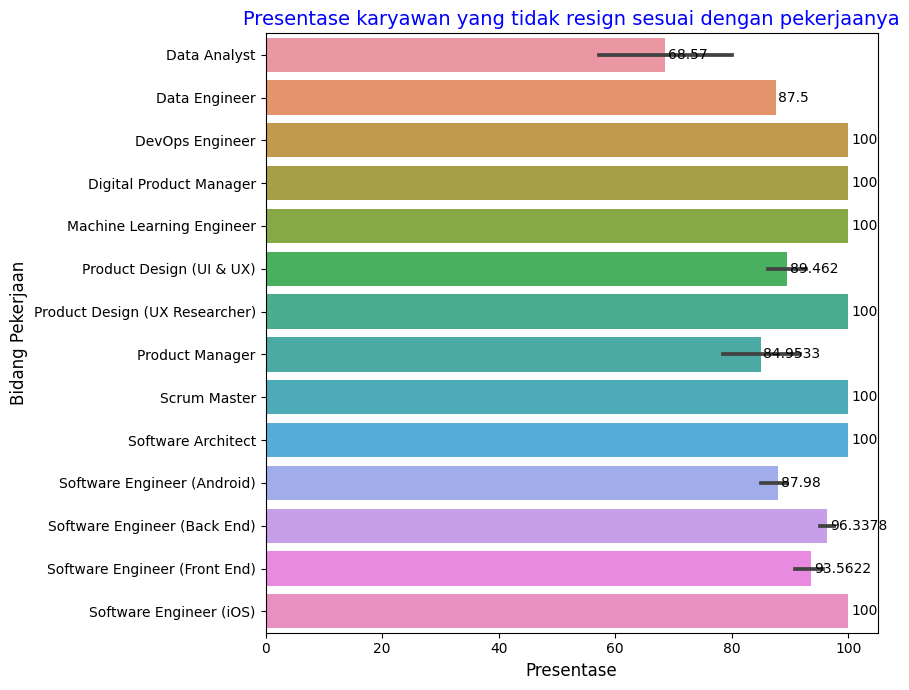

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x='presentase', y='Pekerjaan', data=df_employe)
plt.title('Presentase karyawan yang tidak resign sesuai dengan pekerjaanya', fontsize='14', color='Blue')
plt.xlabel('Presentase', fontsize='12')
plt.ylabel('Bidang Pekerjaan', fontsize='12')
plt.bar_label(ax.containers[0], padding=2)
plt.tight_layout()

dari grafik di atas dapat kita lihat Presentase karyawan yang tidak resign sesuai dengan pekerjaanya'adalah divisi data analyst sekitar 69,57 % artinya tingkat risign paling banyak berada di divisi data analyst

In [ ]:
#buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
df2=df.groupby(['Pekerjaan','JenjangKarir','PerformancePegawai','AlasanResign']).agg({'EnterpriseID':'count'}).reset_index()
df2=df2[df2['AlasanResign']!='masih_bekerja']
df2=df2[df2['Pekerjaan']=='Data Analyst']
df2.columns=['Pekerjaan','Alasan_Resign','Jenjang_karir','Performance_pegawai','jumlah_karyawan']

In [ ]:
fig= px.sunburst(df2, path=['Pekerjaan','Jenjang_karir','Alasan_Resign','Performance_pegawai'], values='jumlah_karyawan', 
                 title='Risign Pegawai berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign Divisi Data Analyst', 
                 width=750, height=750)
fig.show()




1. Terdapat 8 orang data analyst yang risign berdasarkan jenjang karir, ke-delapan data analyst yang resign berasal dari jenjang freshgraduate.
2. Ada dua alasan mengapa mereka risign yaitu toxic culture dan  internal confict. Kedua alasan tersebut merupakan alasan yang berasal dari kondisi lingkungan kerja yang tidak nyaman.
3. Lima dari Delapan karyawan memiliki performance pekerjaan dari bagus sampai sangat bagus. Hal ini cukup disayangkan, karena dari sisi pekerjaan, mereka dapat diandalkan, tetapi memilih untuk resign.
4. Untuk Manajemen untuk memperbaiki lingkungan kerja agar supaya menjadi lingkungan kerja yang nyaman, saling menghargai dan karyawan dapat membangun hubungan baik dengan karyawan lainya

#4

1. Melakukan check kembali kepada tahap data preprocessing yang dilakukan pada tugas 1, mulai dari mendeteksi ada tidaknya missing value pada baris dan kolom, deteksi data duplikat, menanggulangi pencilan pada data, transformasi pada data seperti categorical encoding, melakukan feature engineering, dan feature selection berdasarkan domain expertise. (Hint: Perhatikan fitur-fitur yang sekiranya perlu ditransformasi, jumlah fitur yang direkomendasikan akhir yang direkomendasikan tidak melebihi 40, membuang fitur-fitur yang sekiranya tidak bermakna secara dunia nyata terhadap model.) 
2. Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yang ada (imbalanced learning). (Hint: Cari metode yang paling cocok untuk menyeimbangkan proporsi data training (berdasarkan variable target) agar model nantinya tidak bersifat diskriminatif) 
3. Latihlah model dengan berbagai algoritma ML yang ada, tentukan ML metrics yang sekiranya berkaitan dengan tujuan bisnis untuk menjadi benchmark pada ML model selection. (Hint: Perhatikan jenis metrics yang ada, lakukan training pada data yang sudah dilakukan imbalanced learning) 
4. Pilih ML model terbaik, kemudian lakukan hyperparameter tuning agar meningkatkan performa ML. Gunakan metode pipeline dan cross-validation agar menghasilkan model yang berkualitas (Hint: Perhatikan hyperparameter yang ada pada model terbaik, lakukan tuning yang) 
5. Tampilkan visualisasi dari ML metrics yang diukur, tunjukan pula bahwa ML tidak bersifat diskriminatif ketika melakukan prediksi target. (Hint: Tampilkan visualisasi seperti confusion matrix, ROC plot, atau yang lainnya)

In [ ]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
132,stressedBittern3,110774,Belum_menikah,Wanita,Outsource,Data Engineer,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,LinkedIn,3,4.0,5.0,0.0,1.0,+6285838402xxx,stressedBittern3064@yahoo.com,Magister,apresiasi,1968-07-06,2010-05-01,2020-02-01,2017-04-15,2010,2017.0
100,worldlyPaella8,111157,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,14.0,+6285508465xxx,worldlyPaella8406@yahoo.com,Sarjana,masih_bekerja,1986-07-07,2014-01-06,2020-02-26,NaT,2014,NaN
244,curiousMackerel5,100667,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Pusat,Google_Search,4,4.0,0.0,0.0,4.0,+6289758085xxx,curiousMackerel5858@hotmail.com,Sarjana,masih_bekerja,1973-11-28,2014-09-18,2020-01-15,NaT,2014,NaN
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,2011,NaN
111,thriftyHare2,101407,Lainnya,Wanita,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,3,5.0,0.0,0.0,16.0,+6285581511xxx,thriftyHare2990@gmail.com,Sarjana,masih_bekerja,1970-09-22,2012-09-24,2014-04-02,NaT,2012,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [ ]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
TahunHiring                       

In [ ]:
df=df.fillna(0)
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0
TahunResign                           0


In [ ]:
df.duplicated().sum()

0

### EDA

####Statistical analysis

In [ ]:
cat = []
num = []
dat = []
for i in df.columns: 
    if df[i].dtype == 'O':
        cat.append(i)
    elif df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num.append(i)
    else:
        dat.append(i)

In [ ]:
df[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,287.0,3.836237,1.039942,0.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,287.0,1.167247,2.285537,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,287.0,0.411150,1.273018,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,287.0,10.229965,6.991709,0.0,4.0,10.0,15.0,55.0
TahunHiring,287.0,2012.689895,1.946308,2006.0,2011.0,2013.0,2014.0,2018.0
TahunResign,287.0,625.390244,934.430282,0.0,0.0,0.0,2014.5,2020.0


In [ ]:
df[cat].describe().transpose()

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


####Univariate analysis

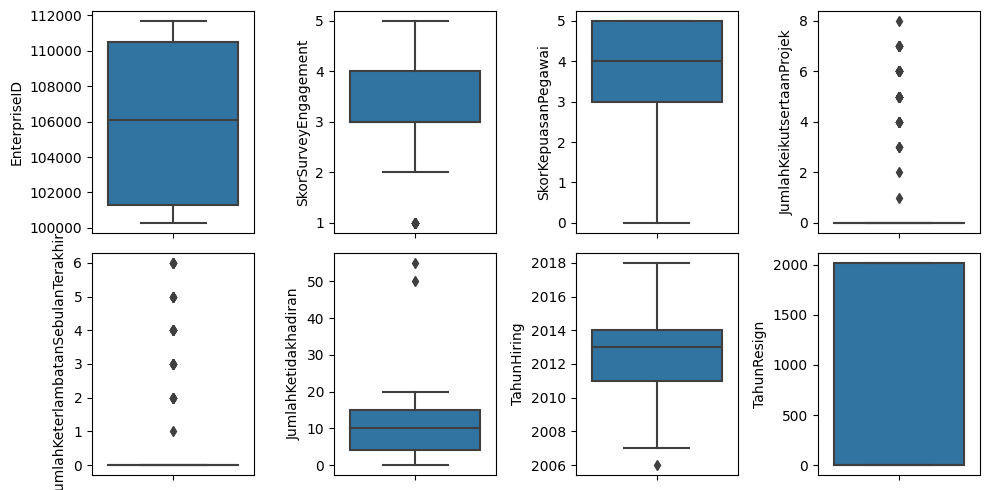

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num)):
    plt.subplot(2,4, i+1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.tight_layout()

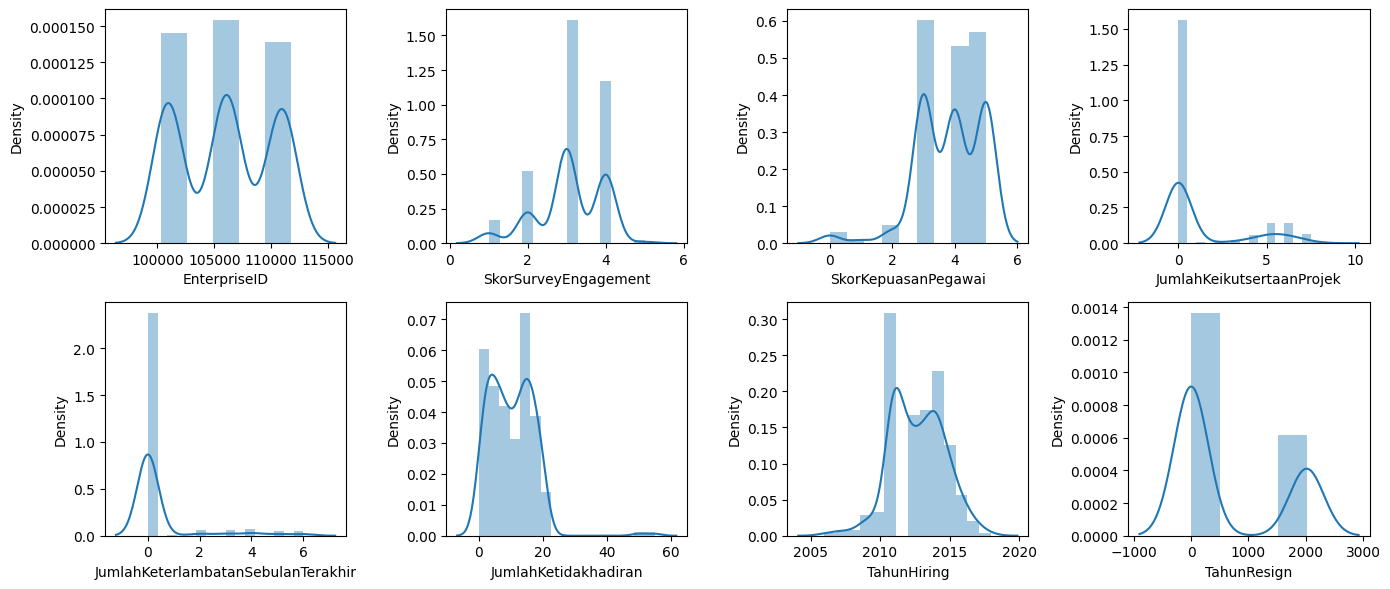

In [ ]:
#data distribution
plt.figure(figsize = (14,6))
for i in range(0, len(num)):
    plt.subplot(2,4, i+1)
    sns.distplot(df[num[i]])
    plt.tight_layout()

####Multivariate analysis

<Axes: >

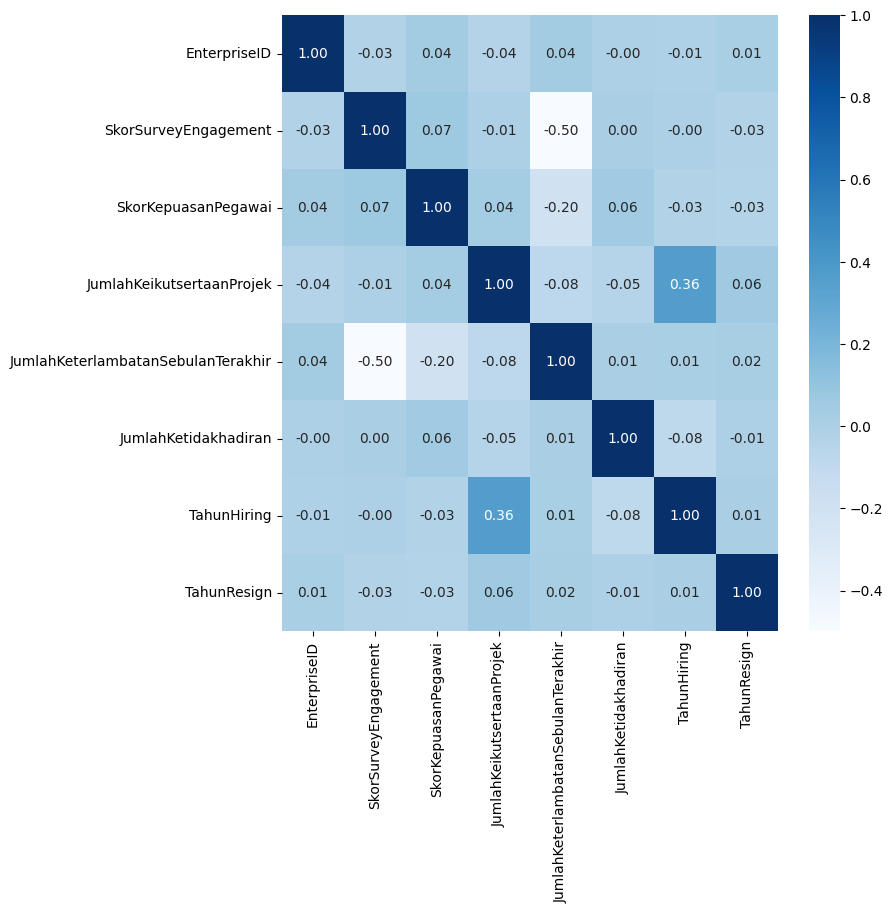

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

##Data Preprocessing

### mising value

In [ ]:
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
TahunHiring                           0
TahunResign                           0


### duplicate data

In [ ]:
df.duplicated().sum()

0

### outlier

In [ ]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 269


### encoding

In [ ]:
performancepegawai_map = {
                    'Sangat_kurang':0, 
                    'Kurang':1,
                    'Biasa':2,
                    'Bagus':3,
                    'Sangat_bagus':4
                    }
df['PerformancePegawai']= df['PerformancePegawai'].map(performancepegawai_map)

In [ ]:
tingkatpendidikan_map = {
                    'Sarjana':1, 
                    'Magister':2,
                    'Doktor':3
                    }
df['TingkatPendidikan']= df['TingkatPendidikan'].map(tingkatpendidikan_map)

In [ ]:
jenjangkarir_map = {
                    'Freshgraduate_program':1, 
                    'Mid_level':2,
                    'Senior_level':3
                    }
df['JenjangKarir']= df['JenjangKarir'].map(jenjangkarir_map)

In [ ]:
mapping_jk = {'Wanita':0,
              'Pria':1}
df['JenisKelamin']=df['JenisKelamin'].map(mapping_jk)

In [ ]:
# OHE
for cat in ['AlasanResign']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

### feature engineering

In [ ]:
df['Resign']=np.where(df['AlasanResign']=='masih_bekerja','0','1')
# 0 : tidak resign
# 1 : resign
df['Resign'] = df['Resign'].astype("int64")

### feature selection

In [ ]:
df_final=df.drop(columns=['Username','EnterpriseID','StatusPernikahan','StatusKepegawaian','Pekerjaan','AsalDaerah','HiringPlatform',
                 'NomorHP','Email','AlasanResign','TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan',
                 'TanggalResign','TahunHiring','TahunResign','AlasanResign_masih_bekerja'])
df_final

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture,Resign
0,1,1,4,4,4.0,0.0,0.0,9.0,2,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,4,4.0,4.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,1,1
2,1,1,3,4,3.0,0.0,0.0,11.0,2,0,0,0,0,1,0,0,0,0,0,1
3,1,1,3,3,3.0,0.0,4.0,6.0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,3,3,3.0,0.0,0.0,11.0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,2,3,2,5.0,0.0,0.0,16.0,1,0,0,0,0,0,0,0,0,0,0,0
283,0,1,2,4,5.0,0.0,0.0,11.0,1,0,0,0,0,1,0,0,0,0,0,1
284,0,3,2,2,5.0,0.0,0.0,17.0,1,0,0,1,0,0,0,0,0,0,0,1
285,1,2,3,4,5.0,0.0,0.0,20.0,1,0,0,0,0,0,1,0,0,0,0,1


###split pada train dan testing

In [ ]:
X = df_final.drop(labels=['Resign'],axis=1)
y = df_final[['Resign']]
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Feature Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

###Feature Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
print('Original')
print(y.value_counts())
print('\n')
print('UNDERSAMPLING')
print(y_under.value_counts())
print('\n')
print('OVERSAMPLING')
print(y_over.value_counts())
print('\n')
print('SMOTE')
print(y_over_SMOTE.value_counts())

Original
Resign
0         185
1          84
dtype: int64


UNDERSAMPLING
Resign
0         57
1         57
dtype: int64


OVERSAMPLING
Resign
0         131
1         131
dtype: int64


SMOTE
Resign
0         131
1         131
dtype: int64


#modeling

In [ ]:
pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#library
from datetime import datetime as dt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(lr)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.93
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(dt)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.93
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


###Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(rf)

Accuracy (Test Set): 0.93
Precision (Test Set): 1.00
Recall (Test Set): 0.78
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00


###AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(ab)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.93
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


###XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(xg)

Accuracy (Test Set): 0.90
Precision (Test Set): 1.00
Recall (Test Set): 0.70
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


### recap :
#Logistic Regression
* Accuracy (Test Set): 0.98 
* Precision (Test Set): 1.00
* Recall (Test Set): 0.93
* F1-Score (Test Set): 0.96
* roc_auc (test-proba): 0.96
* roc_auc (train-proba): 1.00
#Decision Tree
* Accuracy (Test Set): 0.98
* Precision (Test Set): 1.00
* Recall (Test Set): 0.93
* F1-Score (Test Set): 0.96
* roc_auc (test-proba): 0.96
* roc_auc (train-proba): 1.00
#Random forest
* Accuracy (Test Set): 0.94
* Precision (Test Set): 1.00
* Recall (Test Set): 0.81
* F1-Score (Test Set): 0.90
* roc_auc (test-proba): 0.98
* roc_auc (train-proba): 1.00
#AdaBoost
* Accuracy (Test Set): 0.98
* Precision (Test Set): 1.00
* Recall (Test Set): 0.93
* F1-Score (Test Set): 0.96
* roc_auc (test-proba): 0.97
* roc_auc (train-proba): 1.00
#XGBoost
* Accuracy (Test Set): 0.90
* Precision (Test Set): 1.00
* Recall (Test Set): 0.70
* F1-Score (Test Set): 0.83
* roc_auc (test-proba): 0.92
* roc_auc (train-proba): 1.00

##Evaluation pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
#LogisticRegression
pipe1 = make_pipeline(LogisticRegression(random_state=42))
cv_scores1 = cross_val_score(pipe1, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='recall')

print("Cross-validation LogisticRegression: %f" % cv_scores1.mean())

Cross-validation LogisticRegression: 1.000000


In [ ]:
#Decision Tree
pipe2 = make_pipeline(DecisionTreeClassifier(max_depth=2, random_state=42))
cv_scores2 = cross_val_score(pipe2,  X_over_SMOTE, y_over_SMOTE, cv=5, scoring='recall')

print("Cross-validation Decision Tree: %f" % cv_scores2.mean())

Cross-validation Decision Tree: 0.458974


In [ ]:
# RandomForestClassifier
pipe3 = make_pipeline(RandomForestClassifier(max_depth=2, random_state=42))
cv_scores3 = cross_val_score(pipe3, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='recall')

print("Cross-validation RandomForest: %f" % cv_scores3.mean())

Cross-validation RandomForestClassifier: 0.741880


In [ ]:
#AdaBoost
pipe4 = make_pipeline(AdaBoostClassifier( random_state=42))
cv_scores4 = cross_val_score(pipe4, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='recall')

print("Cross-validation AdaBoostClassifier: %f" % cv_scores4.mean())

Cross-validation AdaBoostClassifier: 0.984615


In [ ]:
#XGBoost
pipe5 = make_pipeline(XGBClassifier( random_state=42))
cv_scores5 = cross_val_score(pipe5, X_over_SMOTE, y_over_SMOTE, cv=5, scoring='recall')

print("Cross-validation XGBoost: %f" % cv_scores4.mean())

Cross-validation XGBoost: 0.984615


### Hasil cross validation
* Cross-validation LogisticRegression: 1.000000
* Cross-validation Decision Tree: 0.458974
* Cross-validation RandomForestClassifier: 0.741880
* Cross-validation AdaBoostClassifier: 0.984615
* Cross-validation XGBoost: 0.984615

Berdasrkan Cross-validation model LogisticRegression adalah model terbaik yang dapat digunakan


### ML metrics

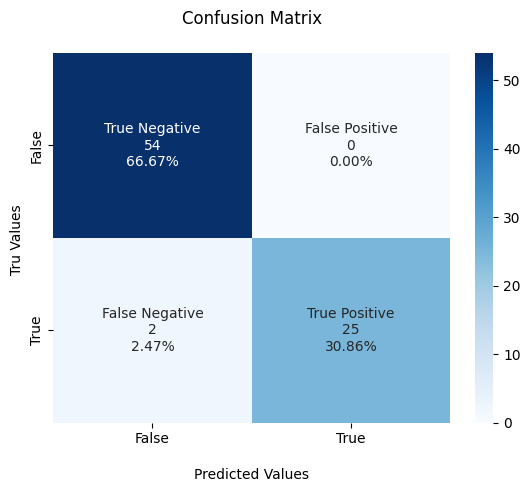

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cf_matrix=confusion_matrix(y_test, y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Tru Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

###Feature Important 

1.0


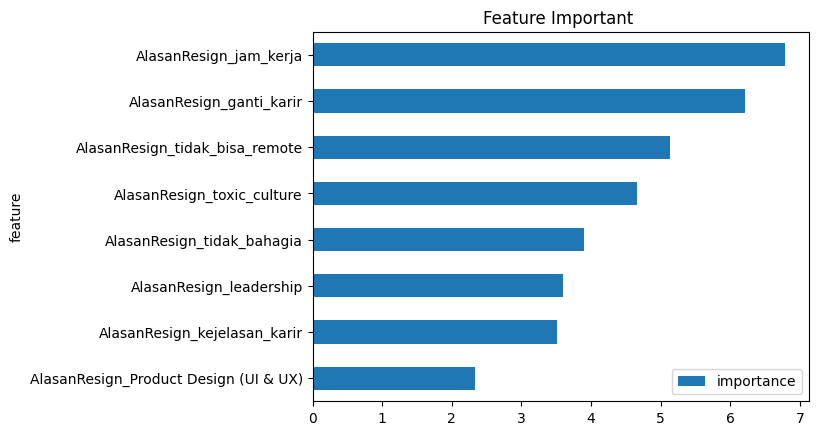

In [ ]:
import math

feature_names = X_over_SMOTE.columns.to_list()

#Get the scores
score = lr.score(X_over_SMOTE.values, y_over_SMOTE)
print(score)
w0 = lr.intercept_[0]
w = lr.coef_[0]

feature_importance = pd.DataFrame(feature_names, columns = ['feature'])
feature_importance['importance'] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)
feature_importance = feature_importance[:8].sort_values(by=['importance'], ascending=False)

#Visualization
ax = feature_importance.sort_values(by=['importance'], ascending=True).plot.barh(x='feature', y='importance')

plt.title('Feature Important ')
plt.show()